### Question 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [ ]:
Dose = np.array([1, 2, 3, 4, 5, 6])
Deaths = np.array([28, 53, 93, 126, 176, 197])
SampleSize = np.array([250, 250, 250, 250, 250, 250])

In [ ]:
def logistic_function(dose, beta0, beta1):
    return 1 / (1 + np.exp(-(beta0 + beta1 * dose)))

params, covariance = curve_fit(logistic_function, Dose, Deaths / SampleSize)
estimated_beta0, estimated_beta1 = params

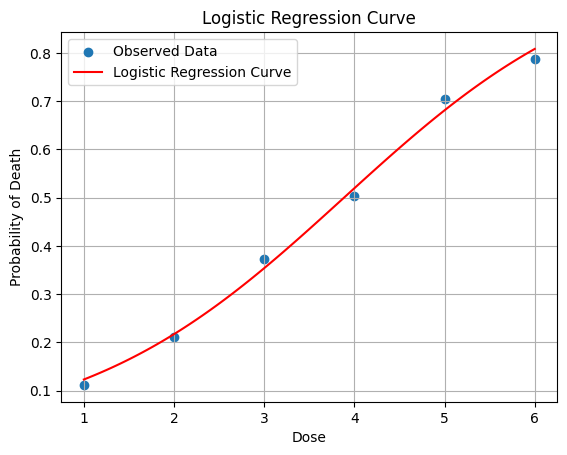

In [ ]:
plt.scatter(Dose, Deaths / SampleSize, label='Observed Data')
dose_range = np.linspace(min(Dose), max(Dose), 100)
logistic_curve = logistic_function(dose_range, estimated_beta0, estimated_beta1)
plt.plot(dose_range, logistic_curve, color='red', label='Logistic Regression Curve')
plt.xlabel('Dose')
plt.ylabel('Probability of Death')
plt.title('Logistic Regression Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Logistic Equation: P(Death) = 1 / (1 + e^(-({:.4f} + {:.4f} * Dose)))".format(estimated_beta0, estimated_beta1))

Logistic Equation: P(Death) = 1 / (1 + e^(-(-2.6423 + 0.6801 * Dose)))


### Question 3

In [ ]:
df3 = pd.read_csv("User_Data.csv")

In [ ]:
df3.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df3.shape

(400, 5)

In [ ]:
df3.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df3.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
x = df3.iloc[:, [2, 3]].values
y = df3.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[61  2]
 [12 25]]


In [ ]:
test_accuracy = lr.score(X_test, y_test)
print("Test Accuracy", test_accuracy)

Test Accuracy 0.86
